In [9]:
# initial imports

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
	
from sklearn.metrics import roc_auc_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.utils import resample

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# load the dataset
df = pd.read_csv("../data/IBM_HR_Data_newer.csv")

# set so it displays all columns
pd.set_option('display.max_columns', None)

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [50]:
# it looks like most of the rows are complete
df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23433.000000,23424.000000,23424.000000,23427.000000,23427.000000,23429.000000,23425.000000,23427.000000,23426.000000,23428.000000,23426.000000,23427.000000,23428.00000,23425.000000,23426.000000,23423.000000,23421.000000,23425.000000,23429.000000
mean,36.936671,801.828765,2.910050,13.681777,2.733811,2.064023,14304.343821,3.887779,3.155852,2.713334,79.993469,0.799846,11.25922,2.800171,2.761803,7.010887,4.227445,2.183821,4.127577
std,9.137432,403.206166,1.024931,1186.544372,0.836860,1.105421,7102.636293,155.332904,0.371215,1.080030,0.706850,1.122454,7.77237,1.308527,0.705788,6.138394,3.627284,3.218615,3.572379
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.00000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.00000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.00000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.00000,30.000000,4.000000,40.000000,22.000000,17.000000,17.000000


In [51]:
# check for NAs
df.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [52]:
# as there are not many NAs I will drop them from the dataframe
df = df.dropna()

In [53]:
# look at values in target 'Attrition'
df.Attrition.unique()

array(['Voluntary Resignation', 'Current employee'], dtype=object)

In [54]:
# make target column binary
cleanup_att = {"Attrition":     {"Current employee": 0, "Voluntary Resignation": 1}}

In [55]:
df.replace(cleanup_att, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [56]:
# drop 'Employee Count' column as all values are '1', drop "Over 18" as all employees are over 18
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Application ID', 'Over18'], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [57]:
# convert 'DistanceFromHome', 'HourlyRate', 'JobSatisfaction', 'PercentSalaryHike', and 'MonthlyIncome' to floats
# so that I can one hot encode later (prior to doing so I received an error message when addig in categorical features)

In [58]:
df['DistanceFromHome'] = df['DistanceFromHome'].astype(float)

In [59]:
df['HourlyRate'] = df['HourlyRate'].astype(float)

In [60]:
df['JobSatisfaction'] = df['HourlyRate'].astype(float)

In [61]:
df['PercentSalaryHike'] = df['PercentSalaryHike'].astype(float)

In [62]:
df['MonthlyIncome'] = df['MonthlyIncome'].astype(float)

In [63]:
# What is the Target/split off target
X = df.drop('Attrition', axis=1)
y = df.Attrition

In [64]:
# Target Balance
df.Attrition.value_counts (normalize=True)

0    0.841665
1    0.158335
Name: Attrition, dtype: float64

In [65]:
# Train Test Split, Don't touch test data until the end
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2020)

In [66]:
# checking shapes:
print(X_train.shape, y_train.shape)

(18563, 32) (18563,)


In [67]:
# Isolate numerical
X_train_num = X_train.select_dtypes(exclude='object')

In [68]:
X_train_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13922,46.0,706.0,2.0,2.0,4.0,82.0,3.0,3.0,82.0,8578.0,19989.0,3.0,14.0,3.0,3.0,80.0,1.0,12.0,4.0,2.0,9.0,8.0,4.0,7.0
14298,35.0,853.0,18.0,5.0,1.0,40.0,2.0,3.0,40.0,9884.0,8302.0,2.0,13.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,4.0,0.0,2.0,3.0
18228,45.0,950.0,28.0,3.0,4.0,99.0,3.0,5.0,99.0,19431.0,15302.0,2.0,13.0,3.0,3.0,80.0,0.0,21.0,3.0,2.0,6.0,0.0,1.0,3.0
3827,39.0,1251.0,21.0,4.0,1.0,32.0,1.0,2.0,32.0,5736.0,3987.0,7.0,19.0,3.0,3.0,80.0,1.0,10.0,1.0,3.0,3.0,2.0,1.0,2.0
20886,42.0,933.0,19.0,3.0,3.0,79.0,2.0,3.0,79.0,10008.0,12023.0,1.0,14.0,3.0,4.0,80.0,0.0,31.0,0.0,2.0,10.0,9.0,5.0,9.0


In [69]:
# Scale
ss = StandardScaler()
X_tr_sc = pd.DataFrame(ss.fit_transform(X_train_num), index= X_train_num.index, columns= X_train_num.columns)
X_tr_sc

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13922,1.000427,-0.235243,-0.888368,-0.882942,1.170791,0.798439,0.385196,0.842296,0.798439,0.437507,0.796828,0.128530,-0.331030,-0.426856,0.269089,0.0,0.243801,0.094746,0.932007,-1.076804,0.322302,1.036295,0.561790,0.798056
14298,-0.207917,0.129592,1.084582,2.033437,-1.563887,-1.266880,-1.023193,0.842296,-1.266880,0.714623,-0.847122,-0.272663,-0.604137,-0.426856,0.269089,0.0,0.243801,-0.163593,0.157400,0.339228,-0.495077,-1.166280,-0.058216,-0.318320
18228,0.890577,0.370333,2.317675,0.089184,1.170791,1.634401,0.385196,2.649767,1.634401,2.740372,0.137532,-0.272663,-0.604137,-0.426856,0.269089,0.0,-0.936913,1.257275,0.157400,-1.076804,-0.168126,-1.166280,-0.368220,-0.318320
3827,0.231481,1.117375,1.454510,1.061311,-1.563887,-1.660274,-2.431581,-0.061440,-1.660274,-0.165528,-1.454090,1.733302,1.034504,-0.426856,0.269089,0.0,0.243801,-0.163593,-1.391813,0.339228,-0.658553,-0.615636,-0.368220,-0.597415
20886,0.561029,0.328141,1.207891,0.089184,0.259232,0.650916,-1.023193,0.842296,0.650916,0.740935,-0.323708,-0.673856,-0.331030,-0.426856,1.194451,0.0,-0.936913,2.548973,-2.166420,-1.076804,0.485777,1.311617,0.871793,1.356245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,0.121631,-1.570487,-1.011677,0.089184,0.259232,0.749264,0.385196,0.842296,0.749264,0.285369,0.150895,0.529723,-0.331030,-0.426856,1.194451,0.0,-0.936913,-0.163593,0.932007,1.755261,-0.985504,-1.166280,-0.678223,-1.155603
12071,1.439824,-1.203171,-0.148512,1.061311,1.170791,-0.578441,0.385196,-0.965176,-0.578441,-0.560408,-0.610664,2.535688,-0.057923,-0.426856,1.194451,0.0,0.243801,-0.938612,-0.617207,0.339228,-0.822028,-0.615636,-0.058216,-0.597415
15100,-0.207917,0.045208,1.084582,2.033437,-0.652328,-0.873486,1.793584,-0.061440,-0.873486,-0.277563,1.686251,0.128530,-1.150350,-0.426856,1.194451,0.0,-0.936913,0.611426,-0.617207,0.339228,1.466632,2.963548,-0.368220,1.635339
7554,-0.976863,0.139519,0.098107,0.089184,0.259232,-0.332569,0.385196,-0.061440,-0.332569,-0.606028,-0.902403,0.128530,-0.604137,2.342710,1.194451,0.0,-0.936913,-0.163593,0.932007,1.755261,0.158826,0.760973,-0.368220,0.798056


In [70]:
# only smote on the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_tr_sm, y_tr_sm = smote.fit_sample(X_tr_sc, y_train) 

# First Simple Model

In [93]:
# FSM with logistic regression, solely numeric
lg = LogisticRegression(class_weight='balanced')
lg.fit(X_tr_sm, y_tr_sm)

LogisticRegression(class_weight='balanced')

In [94]:
# check the model:
X_t, X_val, y_t, y_val = train_test_split(X_tr_sm, y_tr_sm, test_size = 0.25, random_state = 2020)
lg = LogisticRegression()
lg.fit(X_t, y_t)
lg.score(X_val, y_val)

0.6349814743835441

In [95]:
# cross val score
cross_val_score(LogisticRegression(), X_tr_sm, y_tr_sm, cv=3, scoring='f1')

array([0.64544249, 0.64342254, 0.6424672 ])

In [96]:
# checking accuracy
cross_val_score(LogisticRegression(), X_tr_sm, y_tr_sm, cv=3, scoring='accuracy')

array([0.6414335 , 0.63737422, 0.64226162])

In [97]:
# Hyperparameter tuning on logistic solely numeric
cross_val_score(LogisticRegression(C= 25), X_tr_sm, y_tr_sm, cv=3, scoring='f1')

array([0.64557082, 0.64342254, 0.64233716])

In [98]:
# Harsh penalty (C value)
cross_val_score(LogisticRegression(C= 0.5), X_tr_sm, y_tr_sm, cv=3, scoring='f1')

array([0.64544249, 0.64342254, 0.6424672 ])

In [99]:
# more hypertuning
cross_val_score(LogisticRegression(class_weight='balanced'), X_tr_sm, y_tr_sm, cv=3, scoring='f1')

array([0.64544249, 0.64342254, 0.6424672 ])

In [110]:
# Add in categorical features
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_tr_cat = X_train.select_dtypes(include= 'object')

X_tr_oh = pd.DataFrame(ohe.fit_transform(X_tr_cat), index= X_tr_cat.index, columns=ohe.get_feature_names(X_tr_cat.columns))
X_tr_oh

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek,Employee Source_Test
13922,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14298,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18228,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20886,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18682,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12071,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15100,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7554,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [111]:
# joining cat and num
X_tr_final = X_tr_sm.join(X_tr_oh)

In [112]:
X_tr_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek,Employee Source_Test
0,1.000427,-0.235243,-0.888368,-0.882942,1.170791,0.798439,0.385196,0.842296,0.798439,0.437507,0.796828,0.128530,-0.331030,-0.426856,0.269089,0.0,0.243801,0.094746,0.932007,-1.076804,0.322302,1.036295,0.561790,0.798056,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.207917,0.129592,1.084582,2.033437,-1.563887,-1.266880,-1.023193,0.842296,-1.266880,0.714623,-0.847122,-0.272663,-0.604137,-0.426856,0.269089,0.0,0.243801,-0.163593,0.157400,0.339228,-0.495077,-1.166280,-0.058216,-0.318320,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.890577,0.370333,2.317675,0.089184,1.170791,1.634401,0.385196,2.649767,1.634401,2.740372,0.137532,-0.272663,-0.604137,-0.426856,0.269089,0.0,-0.936913,1.257275,0.157400,-1.076804,-0.168126,-1.166280,-0.368220,-0.318320,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.231481,1.117375,1.454510,1.061311,-1.563887,-1.660274,-2.431581,-0.061440,-1.660274,-0.165528,-1.454090,1.733302,1.034504,-0.426856,0.269089,0.0,0.243801,-0.163593,-1.391813,0.339228,-0.658553,-0.615636,-0.368220,-0.597415,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.561029,0.328141,1.207891,0.089184,0.259232,0.650916,-1.023193,0.842296,0.650916,0.740935,-0.323708,-0.673856,-0.331030,-0.426856,1.194451,0.0,-0.936913,2.548973,-2.166420,-1.076804,0.485777,1.311617,0.871793,1.356245,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [125]:
# address NaNs to resolve 'ValueError: Input contains NaN, infinity or a value too large for dtype('float32')''

X_tr_final[:] = np.nan_to_num(X_tr_final)

### Try Random Forest with default parameter settings

In [118]:
rfm = RandomForestClassifier()
rfm.fit(X_tr_final, y_tr_sm)

RandomForestClassifier()

In [119]:
# check training accuracy score
rfm.score(X_tr_final, y_tr_sm)

1.0

In [120]:
# check auc

# Predict class probabilities
prob_y = rfm.predict_proba(X_tr_final)
 
# Keep only the positive class
prob_y = [p[1] for p in prob_y]
 
prob_y[:5] # E

[0.04, 0.1, 0.05, 0.05, 0.91]

In [121]:
print( roc_auc_score(y_tr_sm, prob_y) )

1.0


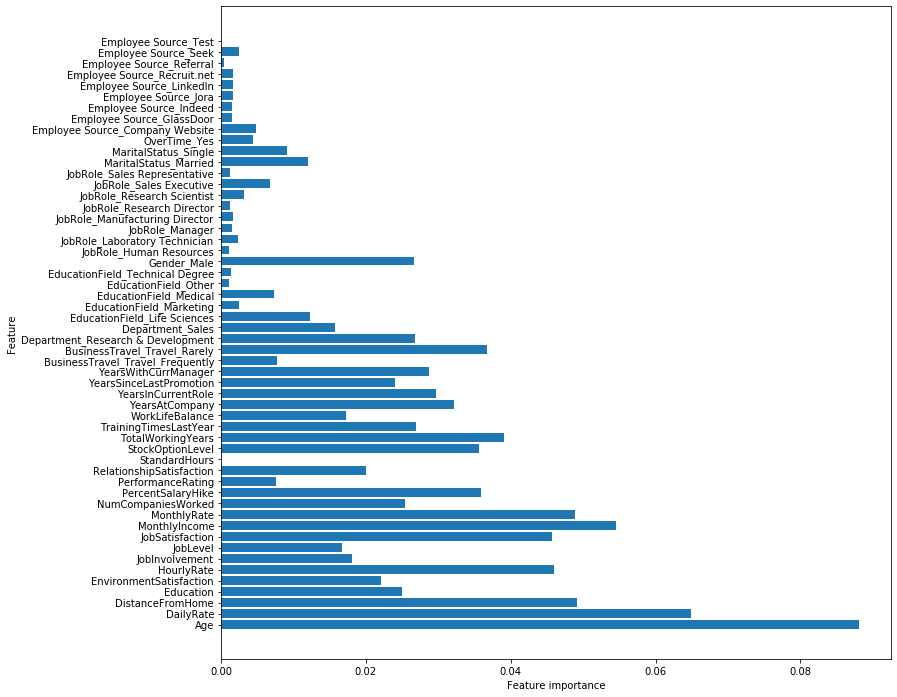

In [124]:
# build a function to plot feature importances
def plot_feature_importances(model):
    n_features = X_tr_final.shape[1]
    plt.figure(figsize=(12,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_tr_final.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(rfm)

In [39]:
# conduct same pre processing on test data as I did on training data

In [126]:
# checking shapes:
print(X_test.shape, y_test.shape)

(4641, 32) (4641,)


In [127]:
# Isolate numerical
X_test_num = X_test.select_dtypes(exclude='object')

In [128]:
X_test_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
47,41.0,143.0,4.0,3.0,1.0,56.0,3.0,2.0,56.0,9355.0,9558.0,5.0,18.0,3.0,3.0,80.0,0.0,8.0,5.0,3.0,8.0,7.0,7.0,7.0
15040,35.0,817.0,1.0,3.0,4.0,85.0,3.0,3.0,85.0,17924.0,4544.0,1.0,11.0,3.0,2.0,80.0,1.0,9.0,3.0,3.0,4.0,2.0,1.0,3.0
7392,28.0,1476.0,16.0,2.0,2.0,68.0,4.0,2.0,68.0,5661.0,4824.0,0.0,19.0,3.0,3.0,80.0,0.0,9.0,2.0,3.0,8.0,3.0,0.0,7.0
3900,30.0,1005.0,3.0,3.0,4.0,88.0,3.0,1.0,88.0,2657.0,8556.0,2.0,11.0,3.0,3.0,80.0,0.0,8.0,5.0,3.0,5.0,2.0,0.0,4.0
20988,42.0,269.0,2.0,3.0,4.0,56.0,2.0,1.0,56.0,2593.0,8007.0,1.0,11.0,3.0,3.0,80.0,1.0,10.0,4.0,3.0,9.0,6.0,7.0,8.0


In [129]:
# Scale
ss = StandardScaler()
X_test_sc = pd.DataFrame(ss.fit_transform(X_test_num), index= X_test_num.index, columns= X_test_num.columns)
X_test_sc.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
47,0.433407,-1.646587,-0.637189,0.088614,-1.593106,-0.501200,0.358484,-0.048270,-0.501200,0.617477,-0.660499,0.900370,0.761778,-0.43589,0.251089,0.0,-0.919679,-0.414725,1.705765,0.336712,0.167259,0.776422,1.527893,0.826783
15040,-0.221075,0.021022,-1.009507,0.088614,1.165016,0.924208,0.358484,0.858704,0.924208,2.450216,-1.370799,-0.684992,-1.154138,-0.43589,-0.673756,0.0,0.236083,-0.287495,0.153823,0.336712,-0.476262,-0.610878,-0.363532,-0.308454
7392,-0.984637,1.651519,0.852081,-0.902364,-0.673732,0.088624,1.762470,-0.048270,0.088624,-0.172597,-1.331133,-1.081332,1.035480,-0.43589,0.251089,0.0,-0.919679,-0.287495,-0.622148,0.336712,0.167259,-0.333418,-0.678769,0.826783
3900,-0.766477,0.486172,-0.761295,0.088614,1.165016,1.071663,0.358484,-0.955244,1.071663,-0.815093,-0.802445,-0.288651,-1.154138,-0.43589,0.251089,0.0,-0.919679,-0.414725,1.705765,0.336712,-0.315382,-0.610878,-0.678769,-0.024645
20988,0.542487,-1.334838,-0.885401,0.088614,1.165016,-0.501200,-1.045502,-0.955244,-0.501200,-0.828781,-0.880219,-0.684992,-1.154138,-0.43589,0.251089,0.0,0.236083,-0.160265,0.929794,0.336712,0.328139,0.498962,1.527893,1.110593


In [130]:
# Add in categorical features
ohe = OneHotEncoder(sparse= False, drop= 'first')

X_test_cat = X_test.select_dtypes(include= 'object')

X_test_oh = pd.DataFrame(ohe.fit_transform(X_test_cat), index= X_test_cat.index, columns=ohe.get_feature_names(X_test_cat.columns))
X_test_oh.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_Test,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
47,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15040,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7392,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3900,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20988,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
# joining cat and num
X_test_final = X_test_sc.join(X_test_oh)

In [132]:
X_test_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EducationField_Test,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
47,0.433407,-1.646587,-0.637189,0.088614,-1.593106,-0.501200,0.358484,-0.048270,-0.501200,0.617477,-0.660499,0.900370,0.761778,-0.43589,0.251089,0.0,-0.919679,-0.414725,1.705765,0.336712,0.167259,0.776422,1.527893,0.826783,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15040,-0.221075,0.021022,-1.009507,0.088614,1.165016,0.924208,0.358484,0.858704,0.924208,2.450216,-1.370799,-0.684992,-1.154138,-0.43589,-0.673756,0.0,0.236083,-0.287495,0.153823,0.336712,-0.476262,-0.610878,-0.363532,-0.308454,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7392,-0.984637,1.651519,0.852081,-0.902364,-0.673732,0.088624,1.762470,-0.048270,0.088624,-0.172597,-1.331133,-1.081332,1.035480,-0.43589,0.251089,0.0,-0.919679,-0.287495,-0.622148,0.336712,0.167259,-0.333418,-0.678769,0.826783,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3900,-0.766477,0.486172,-0.761295,0.088614,1.165016,1.071663,0.358484,-0.955244,1.071663,-0.815093,-0.802445,-0.288651,-1.154138,-0.43589,0.251089,0.0,-0.919679,-0.414725,1.705765,0.336712,-0.315382,-0.610878,-0.678769,-0.024645,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20988,0.542487,-1.334838,-0.885401,0.088614,1.165016,-0.501200,-1.045502,-0.955244,-0.501200,-0.828781,-0.880219,-0.684992,-1.154138,-0.43589,0.251089,0.0,0.236083,-0.160265,0.929794,0.336712,0.328139,0.498962,1.527893,1.110593,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# check test accuracy score
rfm.score(X_test_final, y_test)

0.9573367808661927

In [134]:
# Test set predictions
pred = rfm.predict(X_test_final)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[3804   73]
 [ 125  639]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3877
           1       0.90      0.84      0.87       764

    accuracy                           0.96      4641
   macro avg       0.93      0.91      0.92      4641
weighted avg       0.96      0.96      0.96      4641



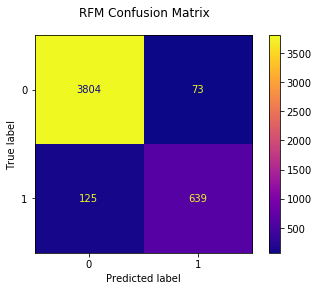

In [135]:
fig, ax = plt.subplots()

fig.suptitle("RFM Confusion Matrix ")

plot_confusion_matrix(rfm, X_test_final, y_test, ax=ax, cmap="plasma");

In [51]:
# grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [2,5,10],
             'n_estimators': [100, 1000]}

gs= GridSearchCV(RandomForestClassifier(), param_grid)
gs.fit(X_tr_final, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10], 'n_estimators': [100, 1000]})

In [53]:
gs.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [54]:
gs.best_score_

0.9220493060263566

In [55]:
y_hat_train = gs.best_estimator_.predict(X_tr_final)
f1_score(y_train, y_hat_train)

0.7502684131415074